In [52]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

from sklearn import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as conf

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

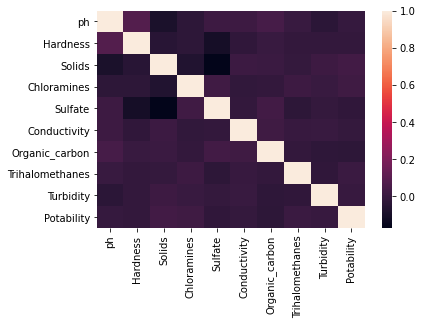

In [53]:
#Import Data and Heat Map
dataFile = pd.read_csv ('water_potability.csv')
dataFile_hm = sns.heatmap(dataFile.corr(), annot = False)

In [54]:
#Split Test and Train Data
from sklearn.model_selection import train_test_split

dataFile = dataFile.dropna()

X = dataFile.drop(columns = ['Potability']).copy()
y = dataFile['Potability']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1608, 9)
(403, 9)
(1608,)
(403,)


The Test Accuracy Score is 0.6401985111662531
The Train Accuracy Score is 0.6106965174129353


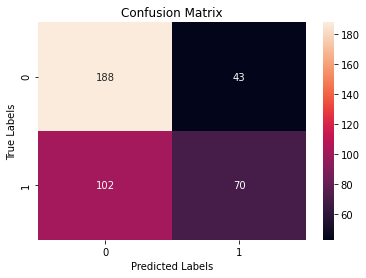

In [55]:
#Naive Bayes Classification

gnb_model = bayes.fit(X_test,y_test)
gnb_pred_test = bayes.predict(X_test)
gnb_pred_train = bayes.predict(X_train)

print('The Test Accuracy Score is',metrics.accuracy_score(y_test,gnb_pred_test))
print('The Train Accuracy Score is',metrics.accuracy_score(y_train,gnb_pred_train))

confmat = conf(y_test,gnb_pred_test,labels=None)
axis = plt.subplot()
sns.heatmap(confmat,annot=True,fmt='d',ax=axis)

axis.set_title('Confusion Matrix')
axis.set_xlabel('Predicted Labels')
axis.set_ylabel('True Labels')
#axis.xaxis.set_ticklabels(['Normal','Suspect','Patologic'])
#axis.yaxis.set_ticklabels(['Normal','Suspect','Patologic'])
plt.show()

In [56]:
#Random Forest Classification
RF_model = RandomForestClassifier()
RF_model.fit(X_test,y_test)
RF_model.score(X_test,y_test)

RFy_pred_test = RF_model.predict(X_test)
RFy_train_pred = RF_model.predict(X_train)

RF_accuracy_train = accuracy_score(y_train,RFy_train_pred)
RF_accuracy_test = accuracy_score(y_test,RFy_pred_test)

print('The Test Accuracy Score is',RF_accuracy_test)
print('The Train Accuracy Score is',RF_accuracy_train)

The Test Accuracy Score is 1.0
The Train Accuracy Score is 0.621268656716418


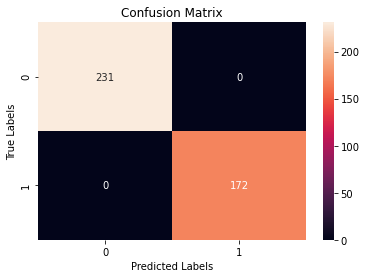

In [57]:
#Random Forest Classification Confusion Matrix
mat_RF = conf(y_test,RFy_pred_test,labels=None)
axis = plt.subplot()
sns.heatmap(mat_RF,annot=True,fmt='d',ax=axis)

axis.set_title('Confusion Matrix')
axis.set_xlabel('Predicted Labels')
axis.set_ylabel('True Labels')
plt.show()

In [58]:
#Linear Discriminant Analysis Classification

lda = LDA(n_components=1)
lda.fit(X_train, y_train)
y_pred=lda.predict(X_test)

LDAtrain = lda.score(X_train, y_train)
LDAtest = lda.score(X_test, y_test)

print('The Test Accuracy Score is',LDAtest)
print('The Train Accuracy Score is',LDAtrain)


The Test Accuracy Score is 0.5707196029776674
The Train Accuracy Score is 0.6069651741293532


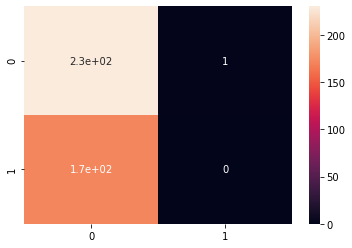

In [59]:
#LDA Classification Confusion Matrix

LDAmatrix = conf(y_test, y_pred)

accuracy_score(y_test, y_pred)

sns.heatmap(LDAmatrix, annot=True)

axis.set_title('Confusion Matrix')
axis.set_xlabel('Predicted Labels')
axis.set_ylabel('True Labels')
plt.show()

In [ ]:
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()

#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

#lda = LDA(n_components = 1)
#X_train = lda.fit_transform(X_train,y_train)
#X_test = lda.transform(X_test)

#evaluation method - random forest classification
#LDAClass = RandomForestClassifier()
#LDAClass.fit(X_test,y_test)
#LDAClass.score(X_test,y_test)

#LDAy_pred_test = LDAClass.predict(X_test)
#LDAy_train_pred = LDAClass.predict(X_train)

#LDA_accuracy_train = accuracy_score(y_train,LDAy_train_pred)
#LDA_accuracy_test = accuracy_score(y_test,LDAy_pred_test)

#print('The Test Accuracy Score is',LDA_accuracy_test)
#print('The Train Accuracy Score is',LDA_accuracy_train)

#LDA_conf = conf(y_test,LDAy_pred_test,labels=None)
#axis = plt.subplot()
#sns.heatmap(LDA_conf,annot=True,fmt='d',ax=axis)